## Exploratory Data Analysis

In [129]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
# Read the data
customer_df=pd.read_csv("Customers.csv")
product_df=pd.read_csv("Products.csv")
transactions_df=pd.read_csv("Transactions.csv")

### Data Description

1. customers data

* CustomerID: Unique identifier for each customer.
* CustomerName: Name of the customer.
* Region: Continent where the customer resides.
* SignupDate: Date when the customer signed up.

2. Products data

* ProductID: Unique identifier for each product.
* ProductName: Name of the product.
* Category: Product category.
* Price: Product price in USD.

3. Transactions data

* TransactionID: Unique identifier for each transaction.
* CustomerID: ID of the customer who made the transaction.
* ProductID: ID of the product sold.
* TransactionDate: Date of the transaction.

### View data 

In [131]:
#Customer data
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [132]:
# Product data
product_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [133]:
# Transaction data
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Data Preprocessing

In [134]:
# Check for missing values
print(f'The number of missing values in customer data: {customer_df.isnull().sum().sum()}')
print(f'The number of missing values in product data: {product_df.isnull().sum().sum()}')
print(f'The number of missing values in transactions data: {transactions_df.isnull().sum().sum()}')

The number of missing values in customer data: 0
The number of missing values in product data: 0
The number of missing values in transactions data: 0


In [135]:
# Convert the 'TransactionDate' to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Extract Month and Year for seasonal analysis
transactions_df['Month'] = transactions_df['TransactionDate'].dt.month
transactions_df['Year'] = transactions_df['TransactionDate'].dt.year
transactions_df['Month_Year'] = transactions_df['TransactionDate'].dt.to_period('M')


### **************** EDA *********************

1. Analysis on customers from different regions

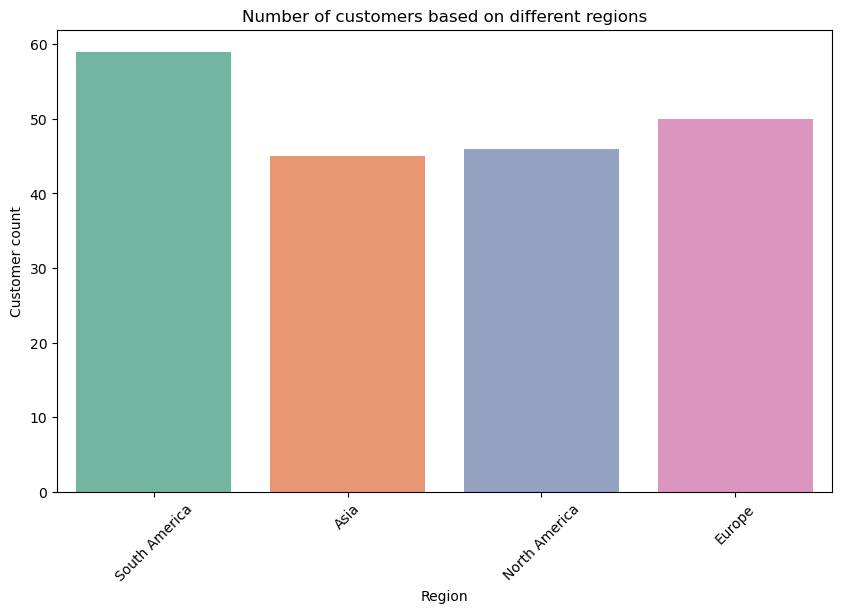

In [136]:
plt.figure(figsize=(10,6))
sns.countplot(data=customer_df,x='Region',palette='Set2')
plt.title("Number of customers based on different regions")
plt.xlabel("Region")
plt.ylabel("Customer count")
plt.xticks(rotation=45)
plt.show()

* The plot gives an idea of customers from different regions .
* South America has the highest number of customers, with a count close to 60. This implies that most customers are from south america.
* Europe has the next highest count, close to 50.
* North America has a customer count of approximately 47.
* Asia has the lowest count,below 45.

2. Visualizing the relationship between Price and TotalValue

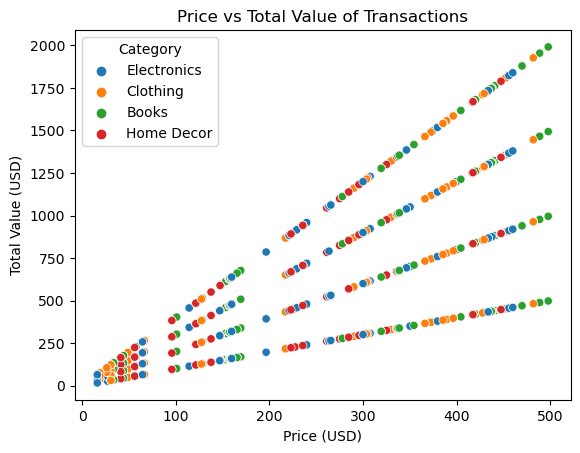

In [137]:
merged_data = transactions_df.merge(customer_df, on='CustomerID').merge(product_df, on='ProductID')
merged_data['Price']=merged_data['Price_x']
merged_data=merged_data.drop(columns=['Price_y','Price_x'],axis=True)

sns.scatterplot(data=merged_data, x='Price', y='TotalValue', hue='Category')
plt.title('Price vs Total Value of Transactions')
plt.xlabel('Price (USD)')
plt.ylabel('Total Value (USD)')
plt.show()

* Positive Correlation: There seems to be a strong positive correlation between Price and Total Value. 

* Category Clustering:  Different categories might have distinct price ranges and contribute differently to the total value.

* Category: The Electronics category appears to have the highest Total Value for a given Price, indicating that Electronics items are generally more expensive and contribute significantly to the overall revenue.
while Home Decor category seems to have the lowest Total Value for a given Price, suggesting that these items are relatively less expensive.




3. Visualizing the distribution of prices among different categories of Products

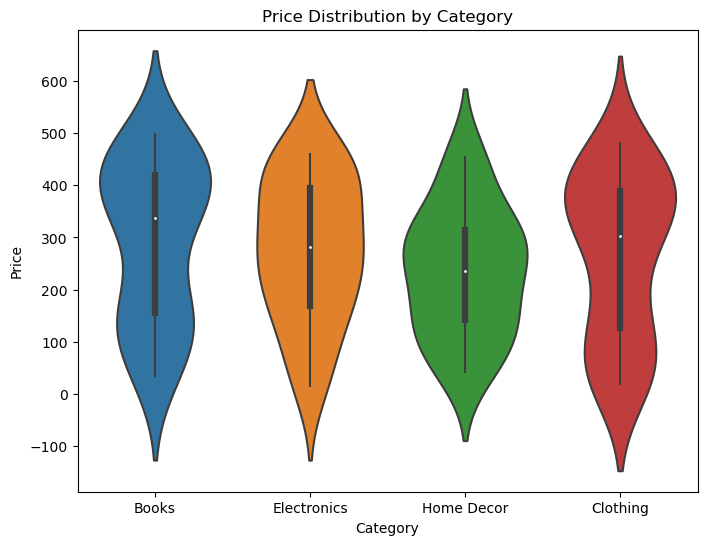

In [138]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Category', y='Price', data=product_df)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

* Price Variation: This plot clearly shows that price distributions vary significantly across different product categories. Electronics and Clothing generally have higher prices compared to Books and Home Decor.
* Outliers: The presence of outliers suggests that some products within each category have significantly higher or lower prices compared to the majority.
* Electronics and Clothing appear to have more skewed distributions compared to Books and Home Decor


In [139]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Month,Year,Month_Year
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,8,2024,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,5,2024,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,4,2024,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,3,2024,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,3,2024,2024-03


4. Line plot showing total sales over time

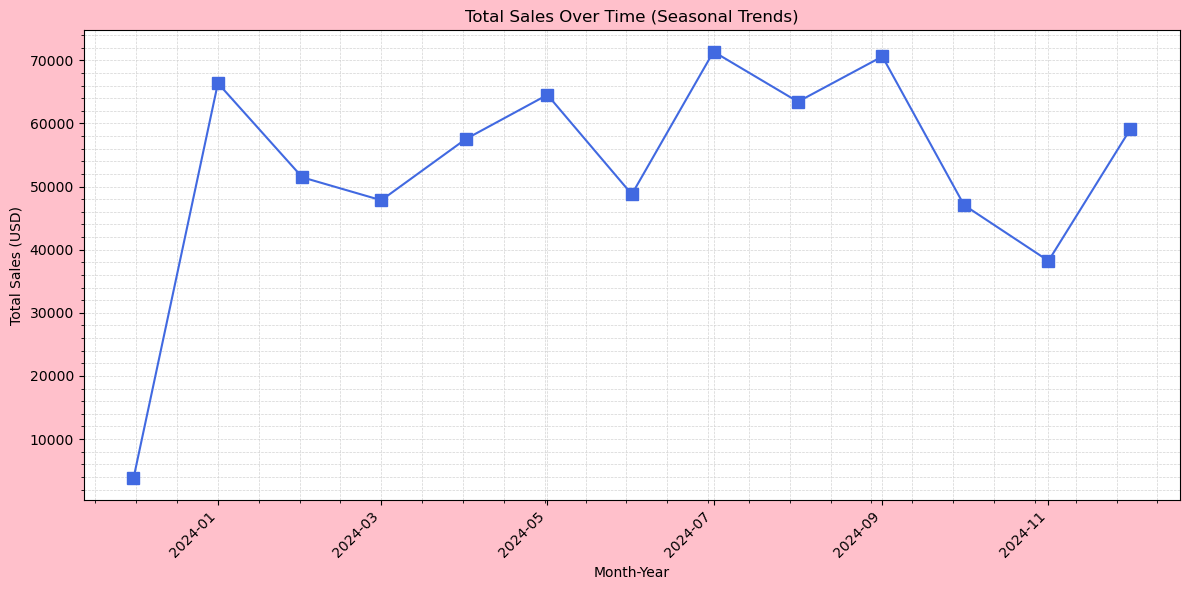

In [141]:
plt.figure(figsize=(12, 6),facecolor='pink')
plt.plot(monthly_sales['Month_Year'], monthly_sales['TotalValue'], marker='s',markersize=8, color='royalblue', label='Total Sales')
plt.minorticks_on()
plt.title('Total Sales Over Time (Seasonal Trends)')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45,ha='right')
plt.grid(True, linestyle='--', color='lightgray', which='both', linewidth=0.5)
plt.tight_layout()
plt.show()

* Seasonality: The fluctuations in sales might indicate seasonal trends. For example, there could be higher sales during certain months due to holidays, weather patterns, or other seasonal factors.
* Market Dynamics: The changes in sales could also be influenced by market conditions, economic factors, or competitive pressures.